# Introduction

This is a testing notebook demonstrating the usage of the wrapper classes.

In [2]:
%load_ext autoreload
%autoreload 2

import sys
import pyreadr
import json
import pandas as pd

sys.path.append('../')
sys.path.append('../references/proxies/')
from models import WRUPredictor, cBISGPredictor, ZipWRUextPredictor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
key = json.load(open('../secrets/CENSUS_API_KEY.json'))
wru_predictor = WRUPredictor(census_api_key=key['CENSUS_API_KEY'])

In [15]:
df

,county_id,county_desc,zip_code,ncid,surname,first,middle,race_code,party_cd,state,zcta,true_race
2,1,ALAMANCE,27302.0,AA216996,AARMSTRONG,TIMOTHY,DUANE,W,REP,NC,27302,white
3,1,ALAMANCE,27215.0,AA98377,AARON,CHRISTINA,CASTAGNA,W,UNA,NC,27215,white
4,1,ALAMANCE,27215.0,AA69747,AARON,CLAUDIA,HAYDEN,W,UNA,NC,27215,white
5,1,ALAMANCE,27253.0,AA170513,AARON,JAMES,MICHAEL,W,DEM,NC,27253,white
7,1,ALAMANCE,27215.0,AA91549,AARON,NATHAN,EDWARD,W,UNA,NC,27215,white
...,...,...,...,...,...,...,...,...,...,...,...,...
8781277,100,YANCEY,28714.0,ES26136,ZITNEY,LAUREN,VICTORIA,W,UNA,NC,28714,white
8781278,100,YANCEY,28714.0,ES17204,ZITNEY,VICTORIA,LEE,W,UNA,NC,28714,white
8781279,100,YANCEY,28714.0,ES26341,ZULICK,DAWN,ELISABETH,W,REP,NC,28714,white
8781280,100,YANCEY,28714.0,ES26380,ZULLINGER,PAMELA,YOUNG,W,UNA,NC,28714,white


## BISG

In [10]:
bisg_result = wru_predictor.inference(df, model='BISG', state="NC", year="2020", census_geo="zcta", census_surname=True, 
                                      surname_only=False, names_to_use="surname", impute_missing=False, skip_bad_geos=True, use_counties=False)
bisg_result

R[write to console]: Collecting 2020 Census data...



Getting census data...


R[write to console]: Predicting race for 2020

R[write to console]: Proceeding with last name predictions...



Predicting race...
ℹ Downloading "wru-data-census_last_c.rds"...
  |======================================================================| 100%
ℹ Downloading "wru-data-first_c.rds"...
  |======================================================================| 100%
ℹ Downloading "wru-data-last_c.rds"...
  |======================================================================| 100%
ℹ Downloading "wru-data-mid_c.rds"...
  |======================================================================| 100%


R[write to console]: Proceeding with Census geographic data at zcta level...

R[write to console]: Using Census geographic data from provided census.data object...

R[write to console]: State 1 of 1: NC

R[write to console]: The following locations in the voter.file are not available in the census data.(listed as state-zcta):
NC-23845, NC-23917, NC-24148, NC-30546, NC-37821

R[write to console]: NOTE: Skipping unavailable geolocations. Returning partial data set.



ℹ All local files already up-to-date!


R[write to console]: 364185 (5.2%) individuals' last names were not matched.



,county_id,county_desc,zip_code,ncid,surname,first,middle,race_code,party_cd,state,zcta,true_race,white,black,hispanic,api,other
8131210,1,ALAMANCE,27302.0,AA216996,AARMSTRONG,TIMOTHY,DUANE,W,REP,NC,27302,white,0.618197,0.206306,0.097963,0.021091,0.056443
3349035,1,ALAMANCE,27215.0,AA98377,AARON,CHRISTINA,CASTAGNA,W,UNA,NC,27215,white,0.578901,0.342392,0.027170,0.006973,0.044564
3348965,1,ALAMANCE,27215.0,AA69747,AARON,CLAUDIA,HAYDEN,W,UNA,NC,27215,white,0.578901,0.342392,0.027170,0.006973,0.044564
3349013,1,ALAMANCE,27253.0,AA170513,AARON,JAMES,MICHAEL,W,DEM,NC,27253,white,0.571233,0.337612,0.036616,0.003732,0.050806
3349091,1,ALAMANCE,27215.0,AA91549,AARON,NATHAN,EDWARD,W,UNA,NC,27215,white,0.578901,0.342392,0.027170,0.006973,0.044564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6304154,100,YANCEY,28714.0,ES26136,ZITNEY,LAUREN,VICTORIA,W,UNA,NC,28714,white,0.981486,0.000546,0.000000,0.000000,0.017969
6304151,100,YANCEY,28714.0,ES17204,ZITNEY,VICTORIA,LEE,W,UNA,NC,28714,white,0.981486,0.000546,0.000000,0.000000,0.017969
5408772,100,YANCEY,28714.0,ES26341,ZULICK,DAWN,ELISABETH,W,REP,NC,28714,white,0.966539,0.000123,0.000936,0.000131,0.032271
6069709,100,YANCEY,28714.0,ES26380,ZULLINGER,PAMELA,YOUNG,W,UNA,NC,28714,white,1.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
df_county = df[df['county_id']==1].copy().reset_index(drop=True)
fbisg_result = wru_predictor.inference(df_county, model='fBISG', state="NC", year="2020", census_geo="zcta", census_surname=True, 
                                         surname_only=False, names_to_use="surname", impute_missing=True, skip_bad_geos=True, use_counties=False)
fbisg_result

R[write to console]: Collecting 2020 Census data...



Getting census data...


R[write to console]: Predicting race for 2020

R[write to console]: Using `predict_race` to obtain initial race prediction priors with BISG model

R[write to console]: Predicting race for 2020

R[write to console]: Proceeding with last name predictions...



Predicting race...
ℹ All local files already up-to-date!


R[write to console]: Proceeding with Census geographic data at zcta level...

R[write to console]: Using Census geographic data from provided census.data object...

R[write to console]: State 1 of 1: NC



ℹ All local files already up-to-date!


R[write to console]: 4327 (4%) individuals' last names were not matched.



ℹ All local files already up-to-date!


R[write to console]: fBISG relies on MCMC; for reproducibility, I am setting RNG seed and returning it as attribute 'RNGseed'.
To silence this message, you can set a seed explicitly by defining the 'seed' element in the control list.

R[write to console]: Forming Pr(race | location) tables from census data...


R[write to console]: Pre-processing names...


R[write to console]: Sampling races...




  |======================================================================| 100%


R[write to console]: Post-processing results and wrapping up.




,county_id,county_desc,zip_code,ncid,surname,first,middle,race_code,party_cd,state,zcta,true_race,white,black,hispanic,api,other
0,1,ALAMANCE,27302.0,AA216996,AARMSTRONG,TIMOTHY,DUANE,W,REP,NC,27302,white,0.569,0.256,0.102,0.015,0.058
1,1,ALAMANCE,27215.0,AA98377,AARON,CHRISTINA,CASTAGNA,W,UNA,NC,27215,white,0.552,0.377,0.022,0.005,0.044
2,1,ALAMANCE,27215.0,AA69747,AARON,CLAUDIA,HAYDEN,W,UNA,NC,27215,white,0.547,0.376,0.025,0.007,0.045
3,1,ALAMANCE,27253.0,AA170513,AARON,JAMES,MICHAEL,W,DEM,NC,27253,white,0.534,0.370,0.037,0.003,0.056
4,1,ALAMANCE,27215.0,AA91549,AARON,NATHAN,EDWARD,W,UNA,NC,27215,white,0.562,0.367,0.025,0.005,0.041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109388,1,ALAMANCE,27244.0,AA182983,ZWINGELBERG,ANNA,MARIE,W,DEM,NC,27244,white,0.770,0.140,0.045,0.011,0.034
109389,1,ALAMANCE,27253.0,BL455029,ZYCZKIEWICZ,DIANE,None,W,REP,NC,27253,white,0.572,0.240,0.121,0.012,0.055
109390,1,ALAMANCE,27302.0,DE247523,ZYCZKIEWICZ,KRISTINE,MARIE,W,REP,NC,27302,white,0.608,0.260,0.075,0.013,0.044
109391,1,ALAMANCE,27302.0,AX71581,ZYCZKIEWICZ,RICHARD,None,W,REP,NC,27302,white,0.568,0.265,0.093,0.011,0.063


In [12]:
bifsg_result = wru_predictor.inference(df, model='BISG', state="NC", year="2020", census_geo="zcta", census_surname=True, surname_only=False, 
                                       names_to_use="surname, first", impute_missing=True, skip_bad_geos=True, use_counties=False)
bifsg_result

R[write to console]: Collecting 2020 Census data...



Getting census data...


R[write to console]: Predicting race for 2020

R[write to console]: Proceeding with first and last name-only predictions...



Predicting race...
ℹ All local files already up-to-date!


R[write to console]: Proceeding with Census geographic data at zcta level...

R[write to console]: Using Census geographic data from provided census.data object...

R[write to console]: State 1 of 1: NC

R[write to console]: The following locations in the voter.file are not available in the census data.(listed as state-zcta):
NC-23845, NC-23917, NC-24148, NC-30546, NC-37821

R[write to console]: NOTE: Skipping unavailable geolocations. Returning partial data set.



ℹ All local files already up-to-date!


R[write to console]: 364185 (5.2%) individuals' last names were not matched.

R[write to console]: 179084 (2.6%) individuals' first names were not matched.



,county_id,county_desc,zip_code,ncid,surname,first,middle,race_code,party_cd,state,zcta,true_race,white,black,hispanic,api,other
3409913,1,ALAMANCE,27302.0,AA216996,AARMSTRONG,TIMOTHY,DUANE,W,REP,NC,27302,white,0.699848,0.259016,0.002825,0.001738,0.036574
2001562,1,ALAMANCE,27215.0,AA98377,AARON,CHRISTINA,CASTAGNA,W,UNA,NC,27215,white,0.717613,0.194044,0.025091,0.007656,0.055596
5493445,1,ALAMANCE,27215.0,AA69747,AARON,CLAUDIA,HAYDEN,W,UNA,NC,27215,white,0.518272,0.238689,0.179443,0.001704,0.061892
254031,1,ALAMANCE,27253.0,AA170513,AARON,JAMES,MICHAEL,W,DEM,NC,27253,white,0.736792,0.233229,0.002920,0.000773,0.026286
3123790,1,ALAMANCE,27215.0,AA91549,AARON,NATHAN,EDWARD,W,UNA,NC,27215,white,0.756590,0.191427,0.006486,0.003792,0.041705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1873152,100,YANCEY,28714.0,ES26136,ZITNEY,LAUREN,VICTORIA,W,UNA,NC,28714,white,0.989096,0.000117,0.000000,0.000000,0.010787
4575777,100,YANCEY,28714.0,ES17204,ZITNEY,VICTORIA,LEE,W,UNA,NC,28714,white,0.979657,0.000415,0.000000,0.000000,0.019928
2211358,100,YANCEY,28714.0,ES26341,ZULICK,DAWN,ELISABETH,W,REP,NC,28714,white,0.984356,0.000043,0.000046,0.000017,0.015538
2432076,100,YANCEY,28714.0,ES26380,ZULLINGER,PAMELA,YOUNG,W,UNA,NC,28714,white,1.000000,0.000000,0.000000,0.000000,0.000000


In [17]:
# wru_ext BISG
df_county = df[df['county_id']==1].copy().reset_index(drop=True)
wruext_bisg_result = wru_ext_predictor.inference(data=df_county, state="NORTH CAROLINA", year1="2020", zip_col="zcta", 
                                                 surname_field="surname", type1="census")
wruext_bisg_result

Running zipWRUext with state=NORTH CAROLINA, year=2020, type=census


,zcta5,county_id,county_desc,ncid,surname,first,middle,race_code,party_cd,state,...,pred.bla,pred.his,pred.asi,pred.oth,white,black,hispanic,api,other,pred_race
1,27215,1,ALAMANCE,AA184152,STRICKLAND,GLORIA,ANN,B,DEM,NC,...,0.147024,0.021192,0.004131,0.026596,0.801057,0.147024,0.021192,0.004131,0.026596,white
2,27215,1,ALAMANCE,AA29506,MCABEE,HUGH,None,W,UNA,NC,...,0.056699,0.013735,0.001926,0.017260,0.910381,0.056699,0.013735,0.001926,0.017260,white
3,27215,1,ALAMANCE,AA221959,MARCUS-FYFFE,SALLY,ANN,W,REP,NC,...,0.106154,0.076375,0.010067,0.014231,0.793173,0.106154,0.076375,0.010067,0.014231,white
4,27215,1,ALAMANCE,BN7628,BONDS,DONNA,None,W,REP,NC,...,0.435715,0.023142,0.003807,0.022533,0.514804,0.435715,0.023142,0.003807,0.022533,white
5,27215,1,ALAMANCE,AA5251,BLACK,SUSAN,BRASWELL,W,UNA,NC,...,0.162919,0.025085,0.004763,0.022361,0.784871,0.162919,0.025085,0.004763,0.022361,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109389,27516,1,ALAMANCE,AA113710,MILLER,DARRIN,GENE,W,UNA,NC,...,0.038265,0.011852,0.015560,0.021152,0.913171,0.038265,0.011852,0.015560,0.021152,white
109390,27516,1,ALAMANCE,AA174639,MCCORMICK,CAROL,ANN,W,DEM,NC,...,0.026391,0.013244,0.016059,0.017277,0.927029,0.026391,0.013244,0.016059,0.017277,white
109391,27516,1,ALAMANCE,AA238500,MILLER,GARRETT,DEAN,W,UNA,NC,...,0.038265,0.011852,0.015560,0.021152,0.913171,0.038265,0.011852,0.015560,0.021152,white
109392,27516,1,ALAMANCE,AA174137,HOWARD,JUDITH,B,W,DEM,NC,...,0.122030,0.015062,0.016764,0.033727,0.812417,0.122030,0.015062,0.016764,0.033727,white


## Evaluation

In [13]:
# select only county_id=1
bisg_result_county_1 = bisg_result[bisg_result['county_id']==1].copy()
fbisg_result_county_1 = fbisg_result[fbisg_result['county_id']==1].copy()
bifsg_result_county_1 = bifsg_result[bifsg_result['county_id']==1].copy()

# select common ncids
common_ncids = set(bisg_result_county_1['ncid'])\
    .intersection(set(fbisg_result_county_1['ncid']))\
        .intersection(set(bifsg_result_county_1['ncid']))
bisg_result_county_1 = bisg_result_county_1[bisg_result_county_1['ncid'].isin(common_ncids)]
fbisg_result_county_1 = fbisg_result_county_1[fbisg_result_county_1['ncid'].isin(common_ncids)]
bifsg_result_county_1 = bifsg_result_county_1[bifsg_result_county_1['ncid'].isin(common_ncids)]

# generate true label using maximum probability
bisg_result_county_1 = wru_predictor.generate_race_label(bisg_result_county_1)
fbisg_result_county_1 = wru_predictor.generate_race_label(fbisg_result_county_1)
bifsg_result_county_1 = wru_predictor.generate_race_label(bifsg_result_county_1)

In [14]:
from utils import weighted_estimator
from const import constants

rows_ = []
PARTIES = df['party_cd'].unique()
RACE_COLS = constants.RACE_COLS_WRU
for party in PARTIES:
    print('\t BISG:')
    estimator_results, true_results = weighted_estimator(bisg_result_county_1, party)
    for race in RACE_COLS:
        rows_.append({
            "method": 'bisg',
            "race" : race, 
            "Proportion": estimator_results[race],
            "party": party
        })

    print('\t fBISG:')
    estimator_results, true_results = weighted_estimator(fbisg_result_county_1, party)
    for race in RACE_COLS:
        rows_.append({
            "method": 'fbisg',
            "race" : race, 
            "Proportion": estimator_results[race],
            "party": party
        })

    print('\t BIFSG:')
    estimator_results, true_results = weighted_estimator(bifsg_result_county_1, party)
    for race in RACE_COLS:
        rows_.append({
            "method": 'bifsg',
            "race" : race, 
            "Proportion": estimator_results[race],
            "party": party
        })
        rows_.append({
            "method": 'true',
            "race" : race, 
            "Proportion": true_results[race],
            "party": party
        })
rows = pd.DataFrame(rows_)
rows

	 BISG:
Weighted estimation (REP): {'white': np.float64(0.3655152574424356), 'black': np.float64(0.2907540605659512), 'api': np.float64(0.24203042567018887), 'hispanic': np.float64(0.19523270213683167), 'other': np.float64(0.33499594177144115)}
True distribution (REP): {'white': np.float64(0.45296869958050984), 'black': np.float64(0.02739612988406156), 'api': np.float64(0.25400641025641024), 'hispanic': np.float64(0.13282921957483235), 'other': np.float64(0.1870788743559255)}
	 fBISG:
Weighted estimation (REP): {'white': np.float64(0.36270286425140646), 'black': np.float64(0.28975106344529605), 'api': np.float64(0.23774854797443423), 'hispanic': np.float64(0.20567885393667837), 'other': np.float64(0.33313045591211576)}
True distribution (REP): {'white': np.float64(0.45296869958050984), 'black': np.float64(0.02739612988406156), 'api': np.float64(0.25400641025641024), 'hispanic': np.float64(0.13282921957483235), 'other': np.float64(0.1870788743559255)}
	 BIFSG:
Weighted estimation (REP):

,method,race,Proportion,party
0,bisg,white,0.365515,REP
1,bisg,black,0.290754,REP
2,bisg,api,0.242030,REP
3,bisg,hispanic,0.195233,REP
4,bisg,other,0.334996,REP
...,...,...,...,...
175,true,api,0.000000,JFA
176,bifsg,hispanic,0.000114,JFA
177,true,hispanic,0.000143,JFA
178,bifsg,other,0.000012,JFA


In [20]:
fbisg_result_county_1['party_cd'].value_counts()

party_cd
UNA    36956
REP    36074
DEM    35450
LIB      588
NLB      257
GRE       38
WTP       18
CST        9
JFA        3
Name: count, dtype: int64

/var/folders/d6/b5nz23jd1vb9pn1cgtv0wy640000gn/T/ipykernel_55756/1126259061.py:8: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.stripplot(data= df_party,
/var/folders/d6/b5nz23jd1vb9pn1cgtv0wy640000gn/T/ipykernel_55756/1126259061.py:8: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.stripplot(data= df_party,
/var/folders/d6/b5nz23jd1vb9pn1cgtv0wy640000gn/T/ipykernel_55756/1126259061.py:8: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.stripplot(data= df_party,


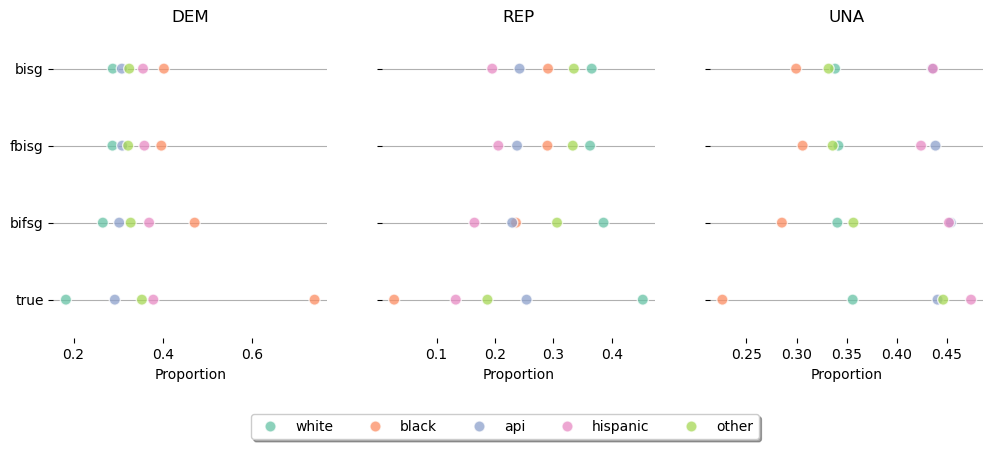

In [21]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axs = plt.subplots(1,3, figsize=(12,4))

for i, party in enumerate(["DEM", "REP", "UNA"]):
    df_party = rows[rows["party"] == party]
    sns.stripplot(data= df_party, 
                  x="Proportion", 
                  y="method", 
                  hue="race", 
                  ax = axs[i], 
                  palette=sns.color_palette("Set2"), 
                  size=8, 
                  jitter=False, 
                  alpha=0.75,
                  linewidth=1, 
                  edgecolor="w")
    axs[i].set_ylabel("")
    axs[i].xaxis.grid(False)
    axs[i].yaxis.grid(True)
    # axs[i].xaxis.set_major_locator(plt.MaxNLocator(4))
    # for n, label in enumerate(axs[i].xaxis.get_ticklabels()):
    #     label.set_visible(True)

    # ymin, ymax = axs[i].get_ylim()
    # axs[i].set_yticks(np.linspace(ymin, ymax, 4))

    party = party[0].upper() + party[1:]
    axs[i].set_title(party)
    if i != 0:
        axs[i].set_yticklabels([])
    if i == 2:
        plt.legend(loc="lower center", ncol=5, fancybox=True, shadow=True, bbox_to_anchor=(-.75, -.35))
    else:
        axs[i].get_legend().remove()

sns.despine(left=True, bottom=True)
plt.show()


['hispanic', 'black', 'other', 'api', 'white']


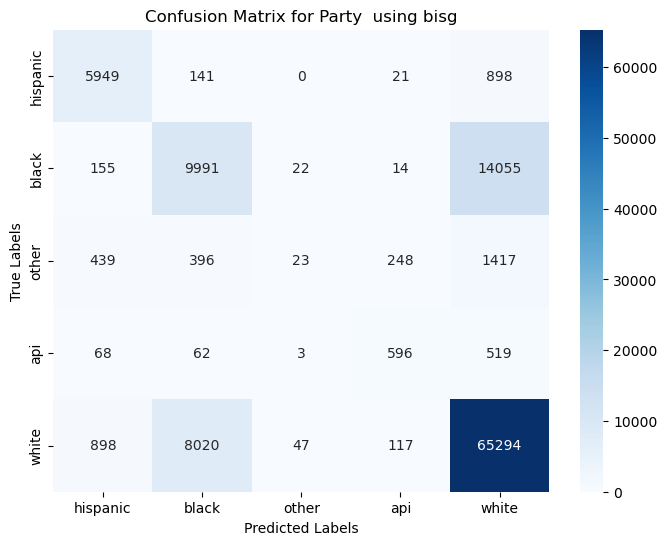

['hispanic', 'black', 'other', 'api', 'white']


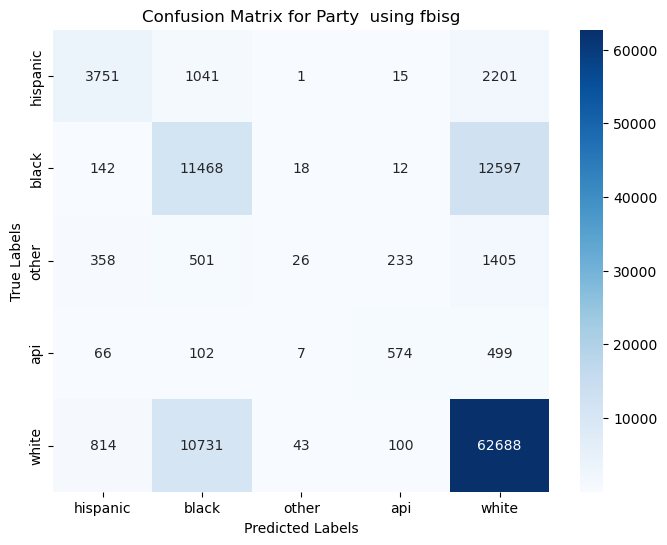

['hispanic', 'black', 'other', 'api', 'white']


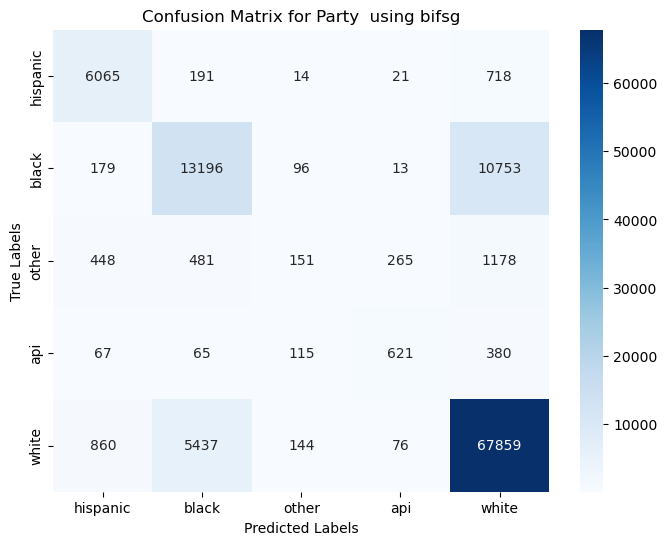

In [23]:
from utils import plot_confusion_matrix

plot_confusion_matrix(bisg_result_county_1, method='bisg')
plot_confusion_matrix(fbisg_result_county_1, method='fbisg')
plot_confusion_matrix(bifsg_result_county_1, method='bifsg')

In [29]:
from sklearn.metrics import f1_score, accuracy_score, classification_report


for dataset in [bisg_result_county_1, fbisg_result_county_1, bifsg_result_county_1]:
    y_true = dataset['true_race']
    y_pred = dataset['pred_race']
    print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         api       0.60      0.48      0.53      1248
       black       0.54      0.41      0.47     24237
    hispanic       0.79      0.85      0.82      7009
       other       0.24      0.01      0.02      2523
       white       0.79      0.88      0.83     74376

    accuracy                           0.75    109393
   macro avg       0.59      0.53      0.53    109393
weighted avg       0.72      0.75      0.73    109393

              precision    recall  f1-score   support

         api       0.61      0.46      0.53      1248
       black       0.48      0.47      0.48     24237
    hispanic       0.73      0.54      0.62      7009
       other       0.27      0.01      0.02      2523
       white       0.79      0.84      0.82     74376

    accuracy                           0.72    109393
   macro avg       0.58      0.46      0.49    109393
weighted avg       0.70      0.72      0.71    109393

              precisio